<a href="https://colab.research.google.com/github/gitHubAndyLee2020/OpenAI_Gym_Atari_Space_Invaders_RL/blob/main/openai_gym_space_invaders_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Invaders

In [1]:
!pip install gym[atari]
!pip install autorom[accept-rom-license]

!pip install pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=848894a66e67f640650cb6a9498c5511c04ee81ed4c29de75abb65207f09122c
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl


In [8]:
!apt-get install xvfb
!pip install xvfbwrapper

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


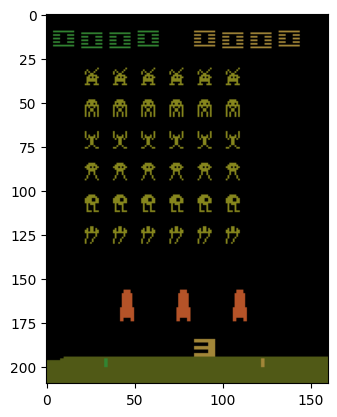

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
env = gym.make("SpaceInvaders-v0")
observation = env.reset()
plt.imshow(observation)
plt.show()
observation, _, _, _ = env.step(1)

In [3]:
import numpy as np
import gym
env = gym.make("SpaceInvaders-v0")
observation = env.reset()
prev_input = None

FIRE_ACTION = 1
RIGHT_ACTION = 2
LEFT_ACTION = 3

gamma = 0.99

x_train, y_train, rewards = [],[],[]
reward_sum = 0
episode_nb = 0

<ipython-input-4-e08fc1ab1283>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


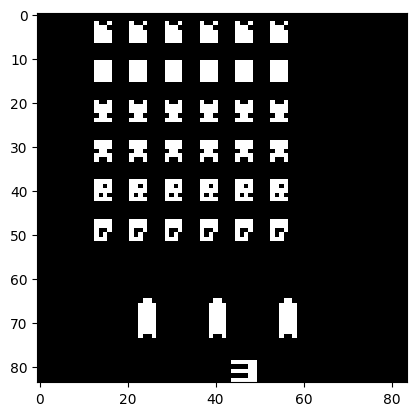

In [4]:
import cv2

def prepro(I):
  """prepro 210x160x3 frame into 168x168, then downscale to 84x84 1D float vector"""
  I = I[27:195] # crop to 168x160
  I = I[:,:,0]  # Convert to grayscale by taking one channel

  # Add 4 black pixels on each side to make it 168x168
  I = cv2.copyMakeBorder(I, 0, 0, 4, 4, cv2.BORDER_CONSTANT, value=0)

  # Downscale to 84x84
  I = cv2.resize(I, (84, 84), interpolation=cv2.INTER_AREA)

  I[I == 0] = 0 # You may need to change this value based on the actual background color in Space Invaders
  I[I != 0] = 1  # Set all other (non-zero) pixels to 1

  return I.astype(np.float).ravel()

# Show preprocessed
obs_preprocessed = prepro(observation).reshape(84, 84)
plt.imshow(obs_preprocessed, cmap='gray')
plt.show()

<ipython-input-4-e08fc1ab1283>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


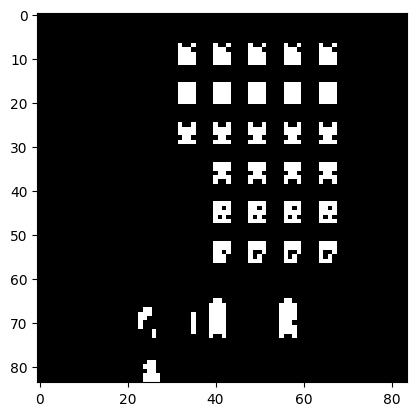

In [5]:
# Number of steps you want to play
num_steps = 500

env.reset()

for _ in range(num_steps):
    action = env.action_space.sample()  # Taking random actions
    observation, _, _, _ = env.step(action)

# Preprocess the final observation
obs_preprocessed = prepro(observation).reshape(84, 84)

# Show preprocessed observation
plt.imshow(obs_preprocessed, cmap='gray')
plt.show()

In [6]:
def discount_rewards(r, gamma):
  """take 1D float array of rewards and compute discounted reward"""
  r = np.array(r)
  discounted_r = np.zeros_like(r)
  running_add = 0

  for t in reversed(range(0, r.size)):
    if r[t] != 0:
      running_add = 0 # if the game ended (in Pong), reset
    running_add = running_add * gamma + r[t]
    discounted_r[t] = running_add

  discounted_r -= np.mean(discounted_r) #normalizing the result
  discounted_r /= np.std(discounted_r) #idem using standar deviation
  return discounted_r

In [28]:
# import necessary modules from keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import tensorflow.keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam

# Input dimension is 7056 after preprocessing (84 * 84)
input_dim = 84 * 84

# Initialize the model
model = Sequential()

# Add a hidden layer with 200 units
model.add(Dense(units=200, input_dim=input_dim, activation='relu', kernel_initializer='glorot_uniform'))

# Add an output layer with 3 units (one for each action)
model.add(Dense(units=3, activation='softmax', kernel_initializer='RandomNormal'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print the model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               1411400   
                                                                 
 dense_5 (Dense)             (None, 3)                 603       
                                                                 
Total params: 1412003 (5.39 MB)
Trainable params: 1412003 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
num_epochs = 50

In [30]:
import time

def print_epochs(epochs, elapsed_time):
    print("==================================================")
    print(f"Epochs: {epochs}")
    print(f"Time elapsed till this epoch: {elapsed_time} seconds")
    print("==================================================")

history = []
observation = env.reset()
prev_input = None

time_history = []
start_time = time.time()  # Initial time
epochs = 0
print_epochs(epochs, 0)

# File to store log of times
with open(f"time_epochs_{num_epochs}.txt", "w") as time_file:
    # Main training loop
    while True:
        if epochs == num_epochs:
            break

        cur_input = prepro(observation)
        x = cur_input - prev_input if prev_input is not None else np.zeros(84 * 84)
        prev_input = cur_input

        proba = model.predict(np.expand_dims(x, axis=1).T)
        action = np.random.choice([FIRE_ACTION, RIGHT_ACTION, LEFT_ACTION], p=proba.ravel())
        y = np.zeros(3)
        y[action - 1] = 1

        x_train.append(x)
        y_train.append(y)

        observation, reward, done, info = env.step(action)
        rewards.append(reward)
        reward_sum += reward

        if done:
            history.append(reward_sum)
            print(f'At the end of episode {episode_nb}, the total reward was: {reward_sum}')

            epochs += 1
            elapsed_time = time.time() - start_time
            time_history.append(elapsed_time)
            print_epochs(epochs, elapsed_time)

            # Log the time to the file
            time_file.write(f"Epoch {epochs}: {elapsed_time}s")

            if episode_nb >= 3000 and reward_sum >= -12:
                break
            else:
                episode_nb += 1
                model.fit(x=np.vstack(x_train), y=np.vstack(y_train), verbose=1, sample_weight=discount_rewards(rewards, gamma))

                x_train, y_train, rewards = [], [], []
                observation = env.reset()
                reward_sum = 0
                prev_input = None

Epochs: 0
Time elapsed till this epoch: 0 seconds
1/1 [==============================] - 0s 16ms/step


<ipython-input-4-e08fc1ab1283>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


1/1 [==============================] - 0s 18ms/step
At the end of episode 4, the total reward was: 35.0
Epochs: 1
Time elapsed till this epoch: 26.143837213516235 seconds
1/1 [==============================] - 0s 18ms/step
At the end of episode 5, the total reward was: 270.0
Epochs: 2
Time elapsed till this epoch: 78.48828029632568 seconds
1/1 [==============================] - 0s 16ms/step
At the end of episode 6, the total reward was: 40.0
Epochs: 3
Time elapsed till this epoch: 102.59415483474731 seconds
1/1 [==============================] - 0s 17ms/step
At the end of episode 7, the total reward was: 390.0
Epochs: 4
Time elapsed till this epoch: 139.71481442451477 seconds
1/1 [==============================] - 0s 16ms/step
At the end of episode 8, the total reward was: 95.0
Epochs: 5
Time elapsed till this epoch: 184.16596913337708 seconds


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment SpaceInvaders-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
<ipython-input-4-e08fc1ab1283>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 18ms/step
At the end of episode 22, the total reward was: 20.0
Epochs: 19
Time elapsed till this epoch: 616.0413639545441 seconds
1/1 [==============================] - 0s 18ms/step
At the end of episode 23, the total reward was: 210.0
Epochs: 20
Time elapsed till this epoch: 657.6261658668518 seconds
1/1 [==============================] - 0s 17ms/step
At the end of episode 24, the total reward was: 445.0
Epochs: 21
Time elapsed till this epoch: 740.6365642547607 seconds
1/1 [==============================] - 0s 17ms/step
At the end of episode 25, the total reward was: 75.0
Epochs: 22
Time elapsed till this epoch: 778.526773929596 seconds
1/1 [==============================] - 0s 17ms/step
At the end of episode 26, the total reward was: 105.0
Epochs: 23
Time elapsed till this epoch: 819.9344909191132 seconds
1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment SpaceInvaders-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


At the end of episode 27, the total reward was: 155.0
Epochs: 24
Time elapsed till this epoch: 865.3799781799316 seconds
1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
<ipython-input-4-e08fc1ab1283>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
At the end of episode 47, the total reward was: 210.0
Epochs: 44
Time elapsed till this epoch: 1725.8012781143188 seconds
1/1 [==============================] - 0s 17ms/step
At the end of episode 48, the total reward was: 155.0
Epochs: 45
Time elapsed till this epoch: 1769.4433934688568 seconds
1/1 [==============================] - 0s 20ms/step
At the end of episode 49, the total reward was: 210.0
Epochs: 46
Time elapsed till this epoch: 1819.4548661708832 seconds
1/1 [==============================] - 0s 18ms/step
At the end of episode 50, the total reward was: 135.0
Epochs: 47
Time elapsed till this epoch: 1863.8526709079742 seconds
1/1 [==============================] - 0s 17ms/step
At the end of episode 51, the total reward was: 105.0
Epochs: 48
Time elapsed till this epoch: 1900.1006305217743 seconds
1/1 [==============================] - 0s 22ms/step
At the end of episode 52, t

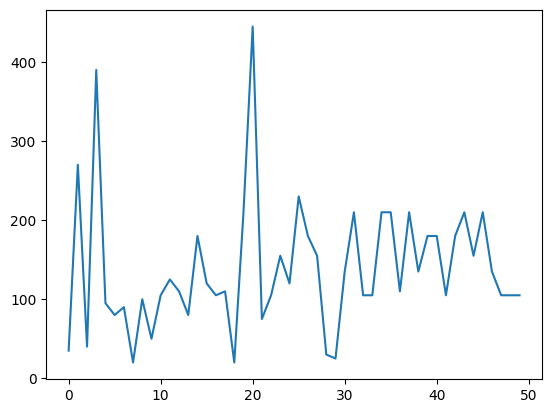

In [31]:
plt.plot(history)
plt.show()

In [32]:
with open(f"history_epochs_{num_epochs}.txt", "w") as history_file:
  for history_item in history:
    history_file.write(f"{history_item}\n")

In [33]:
model.save(f'space_invaders_epochs_{num_epochs}.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
from tensorflow.keras.models import load_model

loaded_model = load_model(f'space_invaders_epochs_{num_epochs}.h5')

In [35]:
import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
from pyvirtualdisplay import Display
import numpy as np
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

# Utility functions for video recording
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

def wrap_env(env):
  env = RecordVideo(env, './video')
  return env

# Initialize display
display = Display(visible=0, size=(1400, 900))
display.start()

# Create Space Invaders environment and wrap it for video recording
env = wrap_env(gym.make('SpaceInvaders-v0'))
observation = env.reset()
new_observation = observation
prev_input = None
done = False

while True:
  # Preprocess the observation
  cur_input = prepro(observation)
  x = cur_input - prev_input if prev_input is not None else np.zeros(84 * 84)
  prev_input = cur_input

  # Get action probabilities from the model
  proba = model.predict(np.expand_dims(x, axis=0))

  # Sample an action based on probabilities
  action = np.random.choice([FIRE_ACTION, RIGHT_ACTION, LEFT_ACTION], p=proba.ravel())

  # Render the environment
  env.render()

  # Take the selected action
  observation = new_observation
  new_observation, reward, done, info = env.step(action)

  if done:
    break

# Close environment and display video
env.close()
show_video()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `R

1/1 [==============================] - 0s 17ms/step


<ipython-input-4-e08fc1ab1283>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/u

1/1 [==============================] - 0s 16ms/step
